# **Employee Attrition Analysis and Prediction**

In [105]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score
import warnings
warnings.filterwarnings("ignore")


In [47]:
#Loading the data
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Data Exploration**

In [48]:
#rows and columns present
df.shape

(1470, 35)

In [49]:
#Data type of columns
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [50]:
# Convert datatypes of categorical columns from numerical to object
for column in ["Education","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","PerformanceRating","RelationshipSatisfaction","WorkLifeBalance","JobLevel","NumCompaniesWorked","StockOptionLevel"]:
    df[column] = df[column].astype(object)

In [51]:
# Descriptive statistics of numerical columns
df.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,6502.931293,14313.103401,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,4707.956783,7117.786044,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,8379.000000,20461.500000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [52]:
#Removing useless columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [53]:
# Descriptive statistics of cateogorical columns
df.describe(include=object)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,5,9,4,3,10,2,2,4,4,4
top,No,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Sales Executive,4,Married,1,No,3,3,0,3
freq,1233,1043,961,572,606,453,882,868,543,326,459,673,521,1054,1244,459,631,893


In [54]:
# Split dataset into numerical and categorical
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include=object)

In [55]:
# Find unique classes for each categorical columns
classes = []
for col in df.select_dtypes(include=object).columns:
    classes.append(df[col].nunique())

In [56]:
pd.DataFrame({"Number of categories":classes},index=df.select_dtypes(include=object).columns)

,Number of categories
Attrition,2
BusinessTravel,3
Department,3
Education,5
EducationField,6
EnvironmentSatisfaction,4
Gender,2
JobInvolvement,4
JobLevel,5
JobRole,9


In [57]:
# Checking for missing values
df.isnull().sum().sum()

0

# **Exploratory Data Analysis**

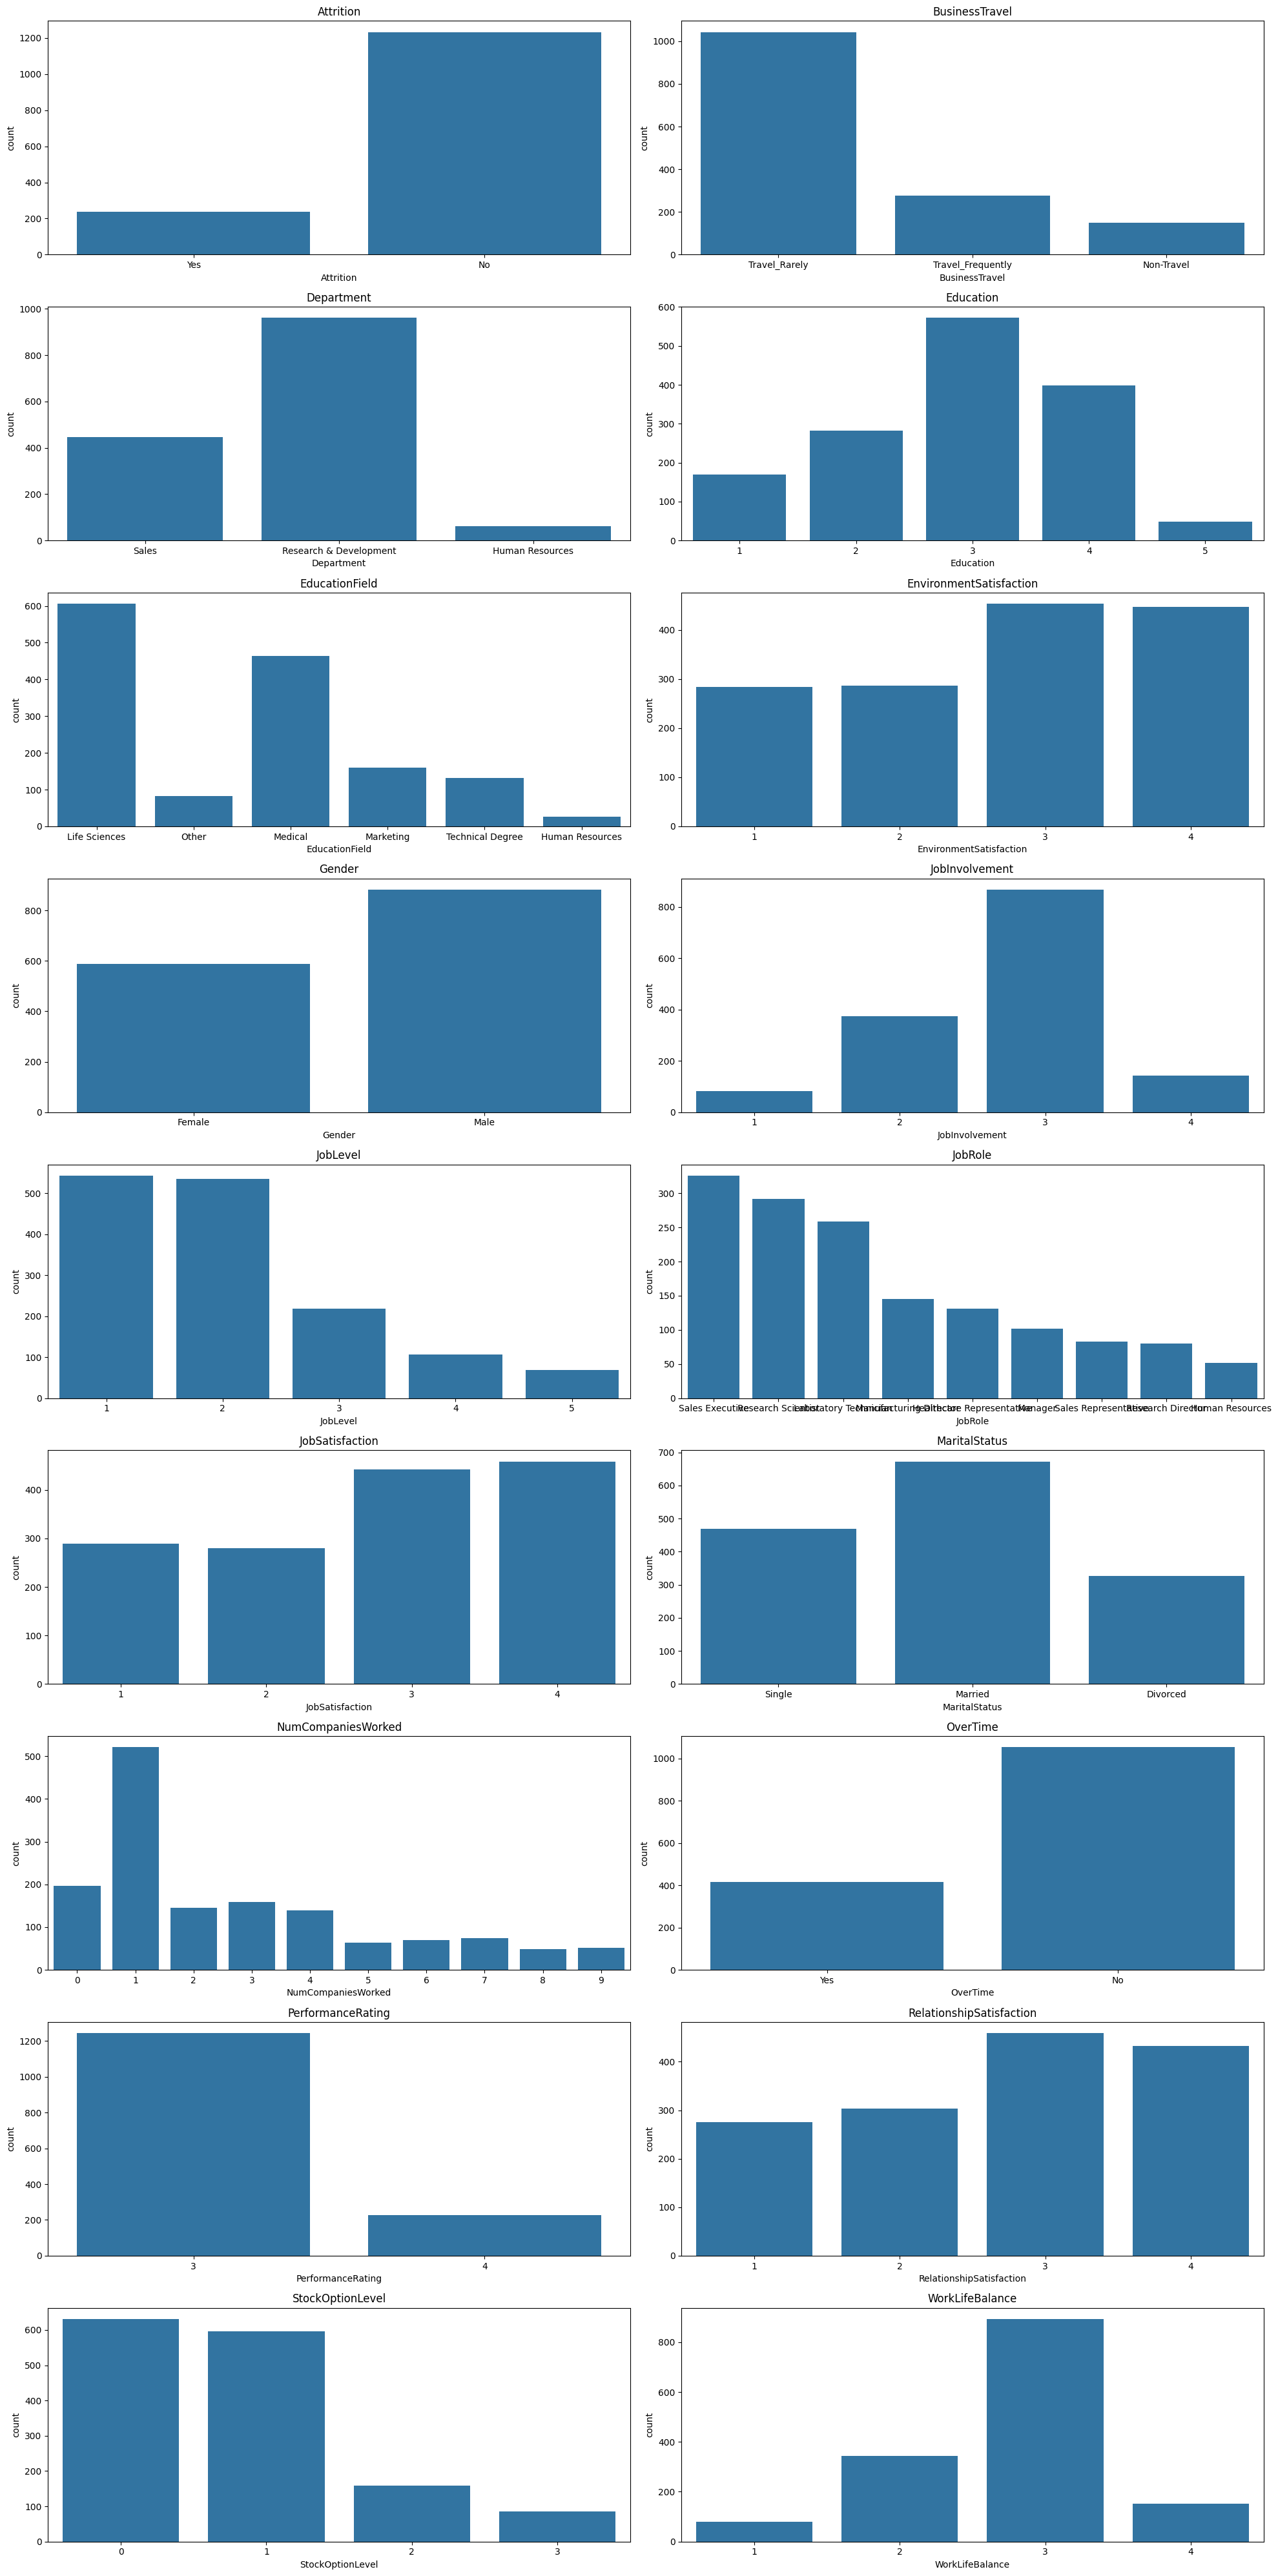

In [58]:
#Count Plots for Categorial Data
fig,subplots = plt.subplots(9,2,figsize=(20,40))
for col,axis in zip(df_cat.columns,subplots.flatten()):
    sns.countplot(x=col, data=df_cat, ax=axis)
    axis.set_title(col)
plt.tight_layout()
plt.show()


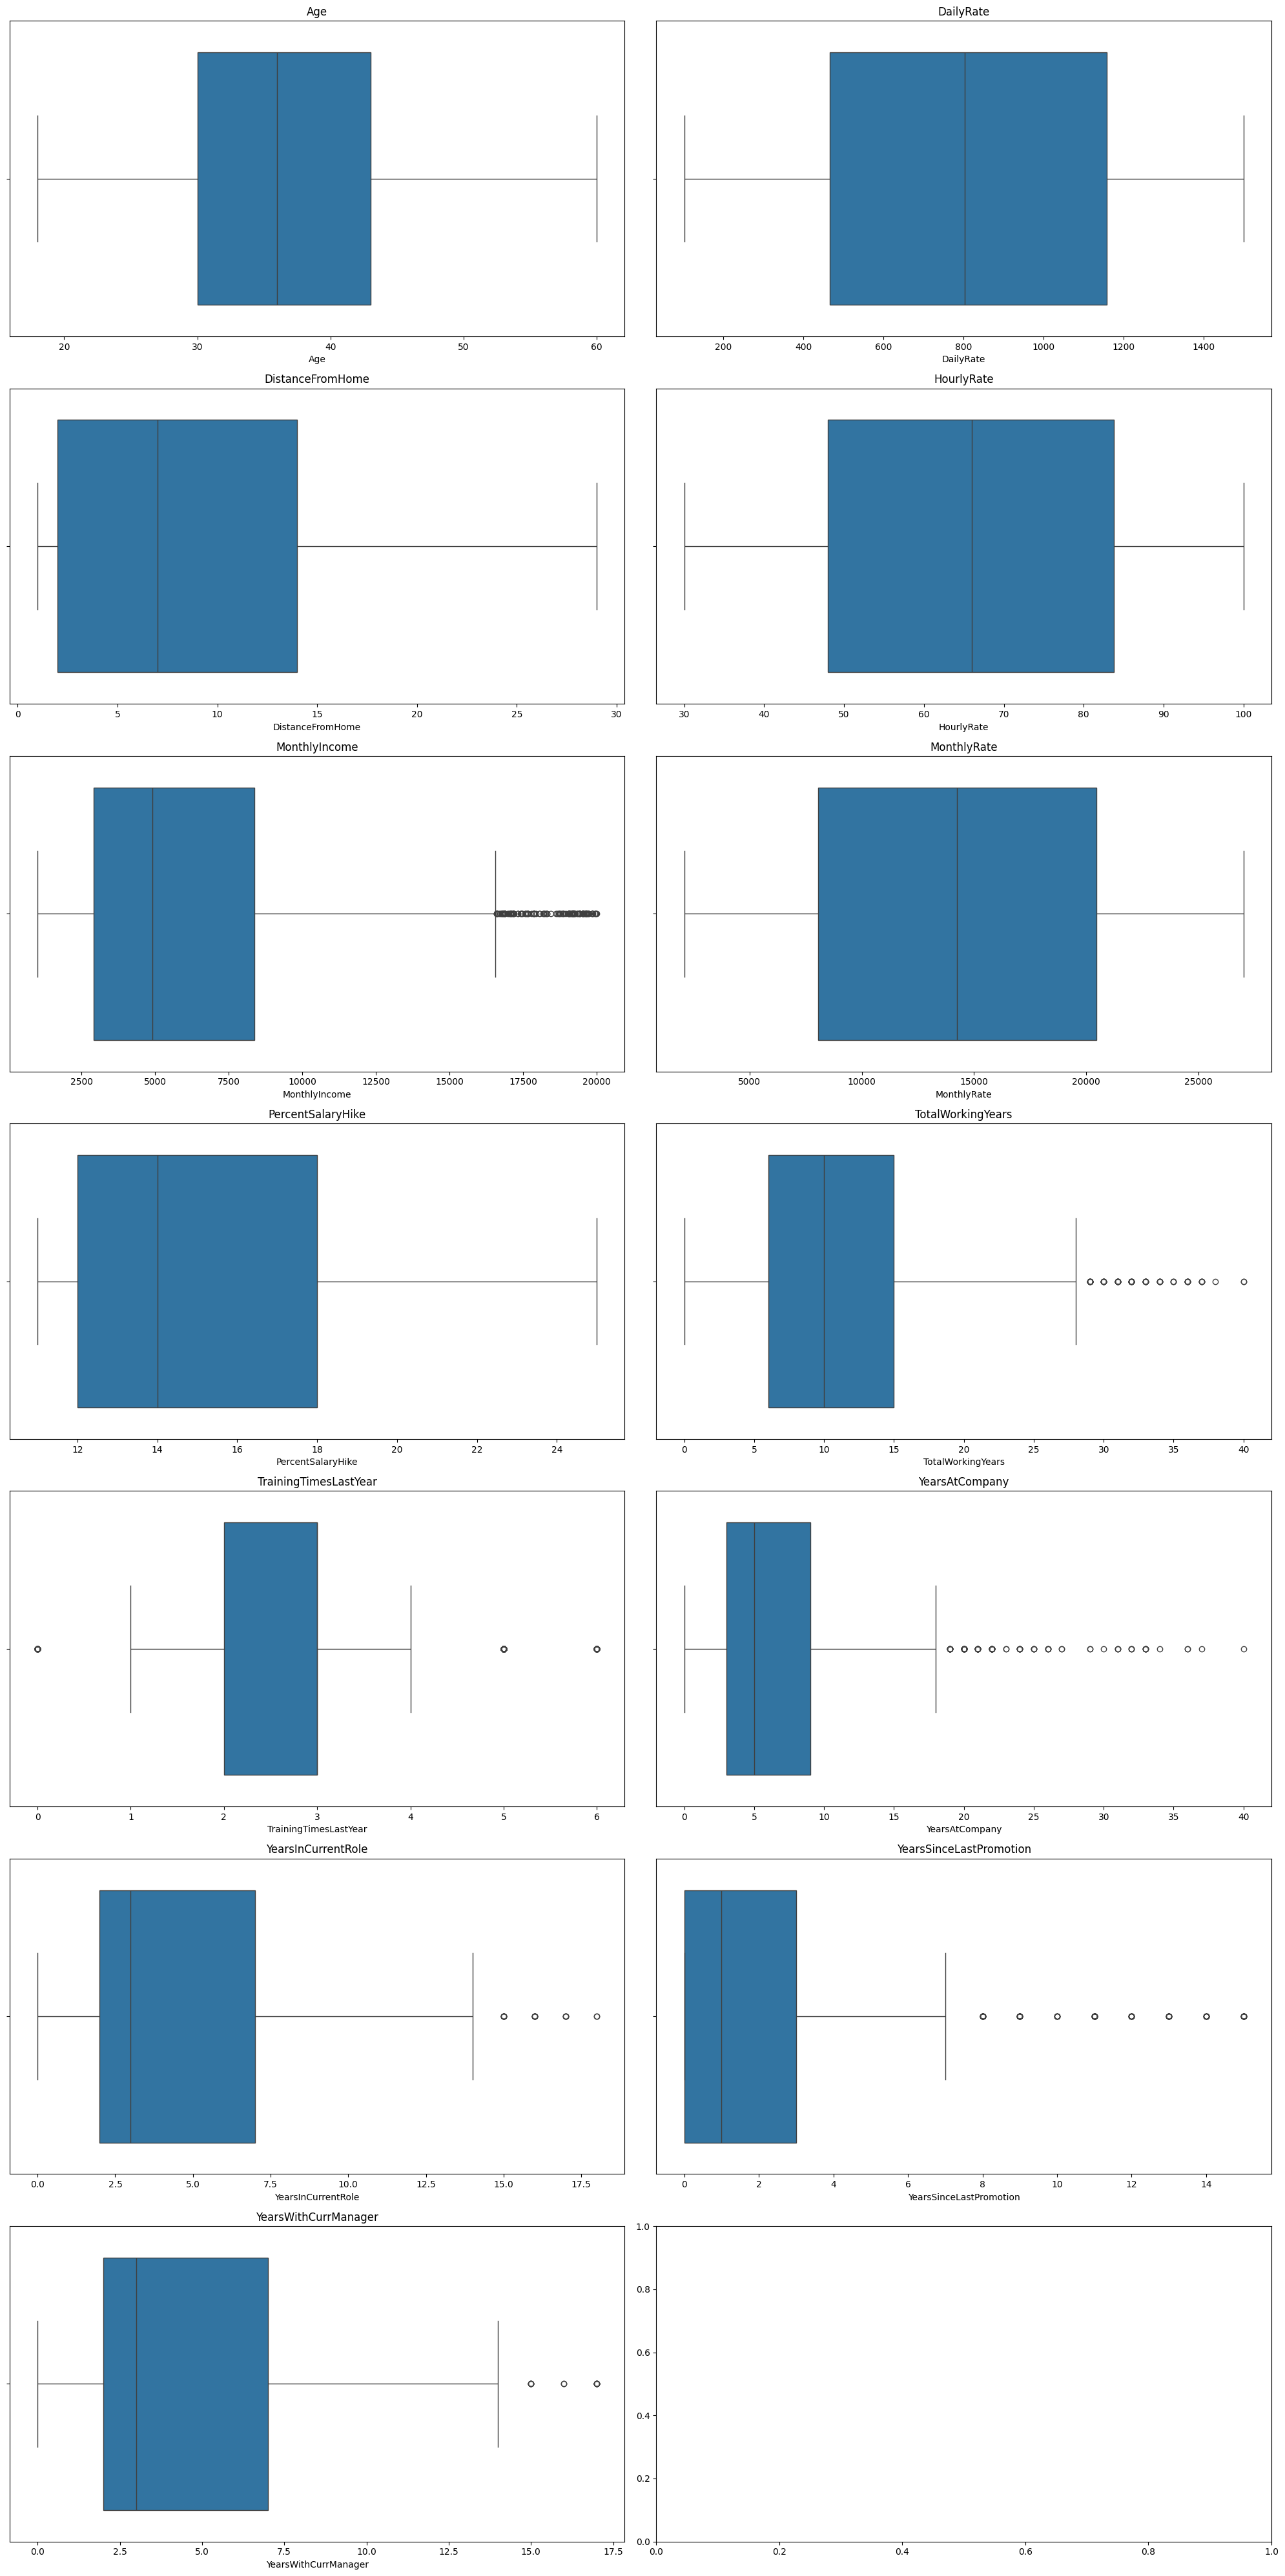

In [59]:
#Box Plot for numerical data
fig,subplots = plt.subplots(7,2,figsize=(20,40))
for col,axis in zip(df_num.columns,subplots.flatten()):
    sns.boxplot(x=col, data=df_num, ax=axis)
    axis.set_title(col)
plt.tight_layout()
plt.show()

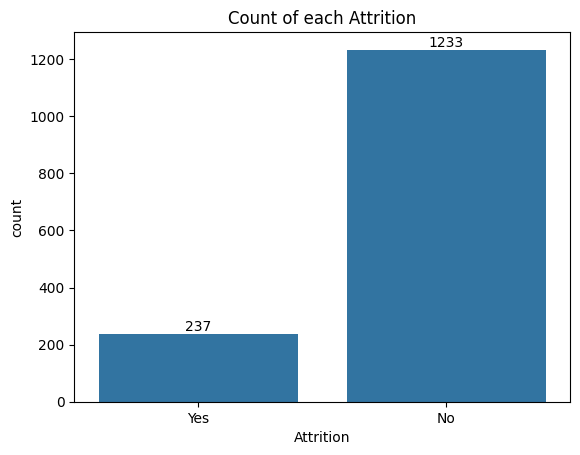

In [60]:
#Visualizing count of the Targeted column
ax=sns.countplot(x=df['Attrition'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Count of each Attrition')
plt.show()


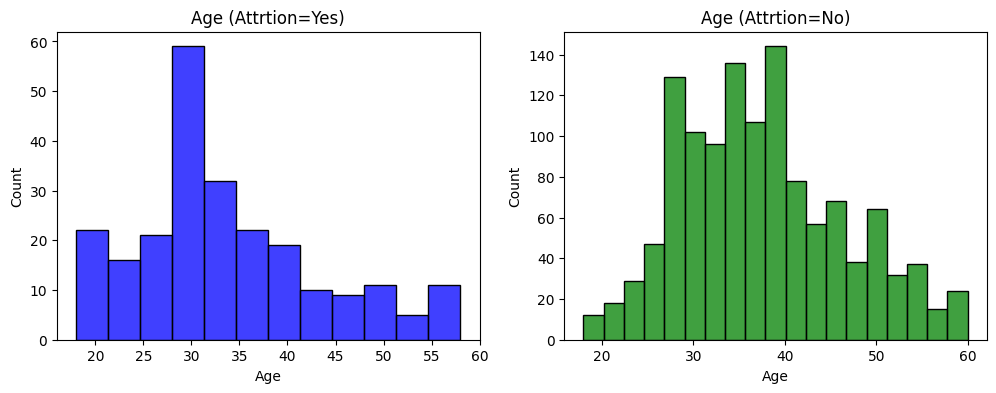

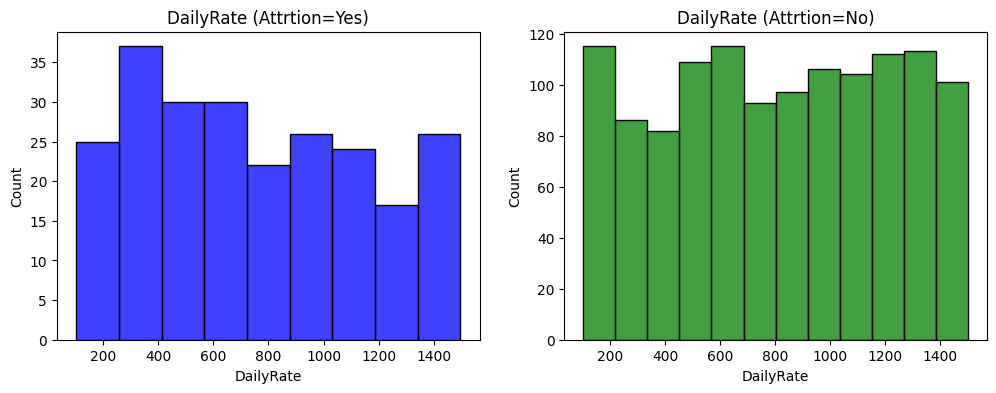

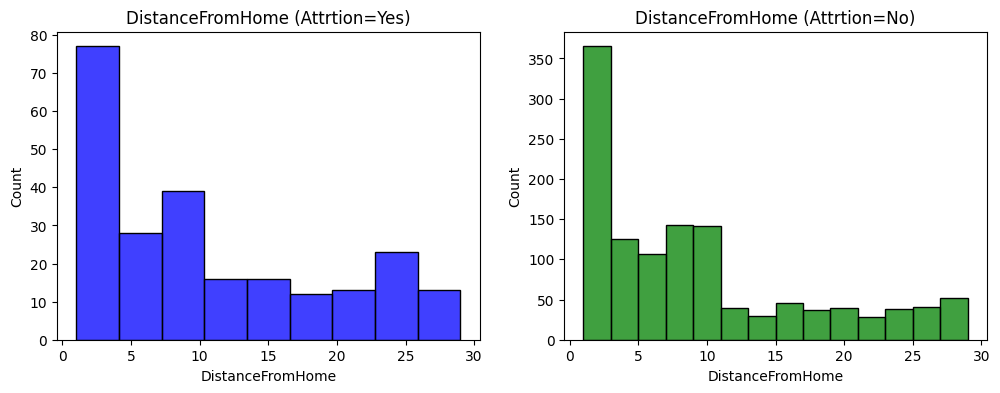

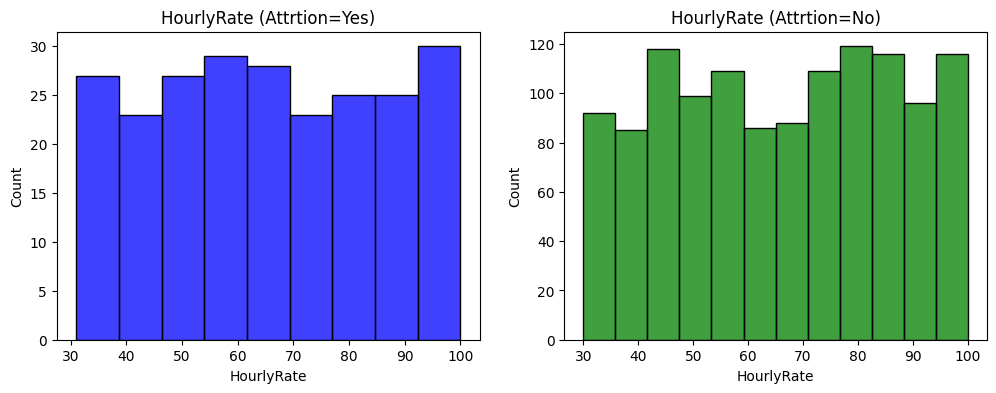

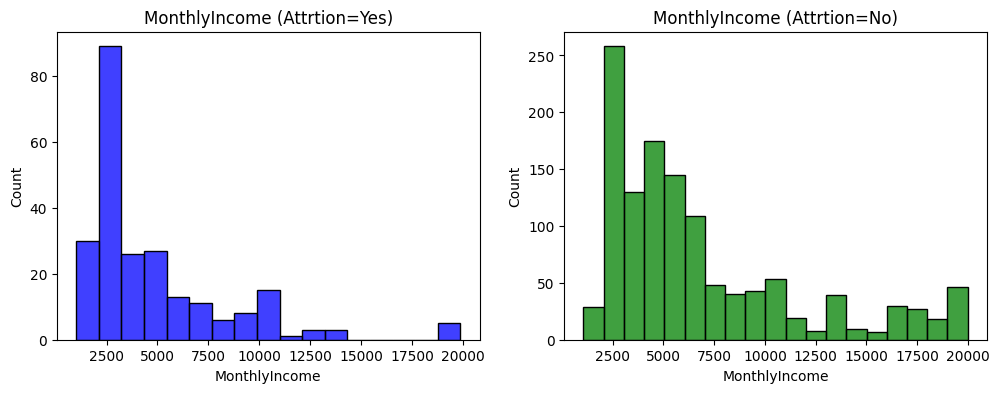

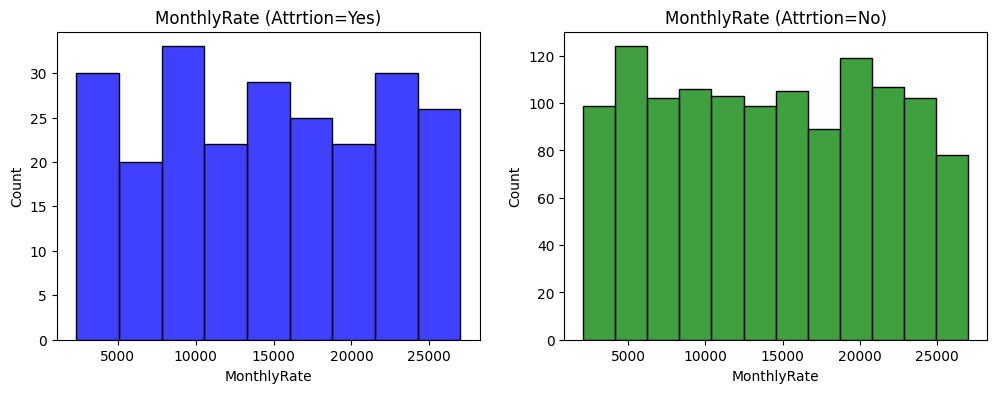

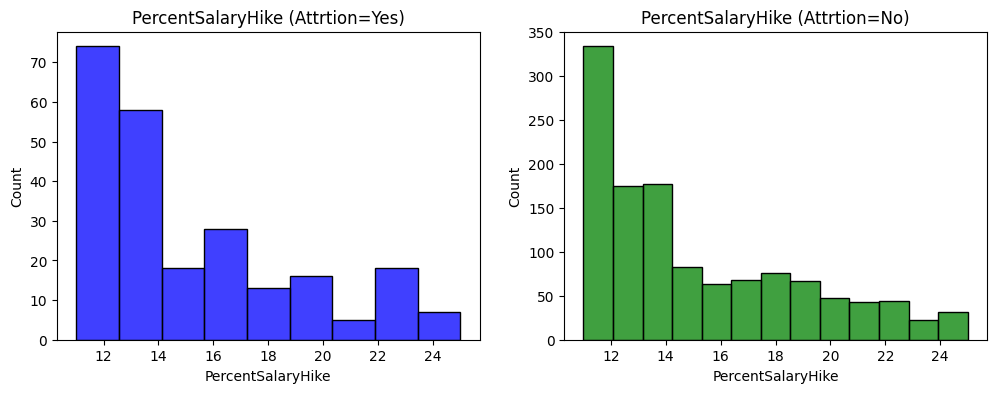

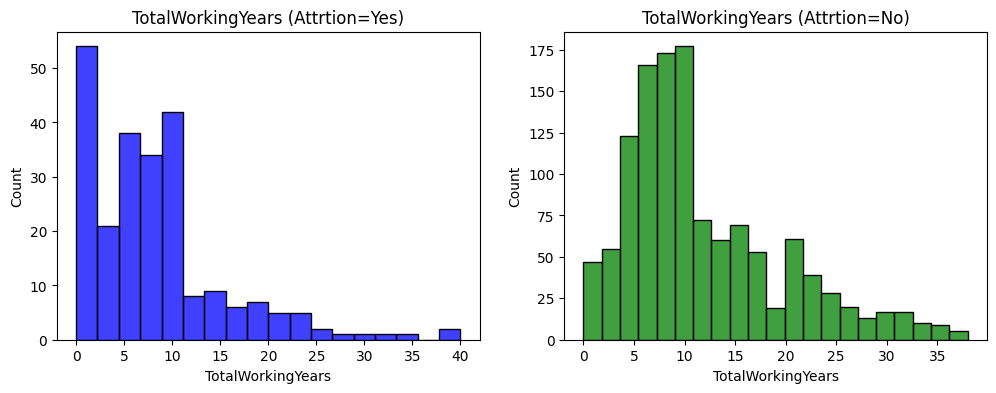

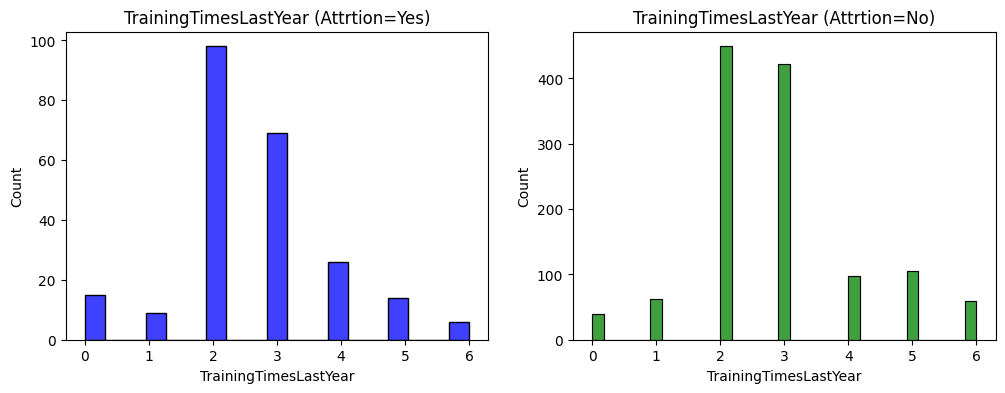

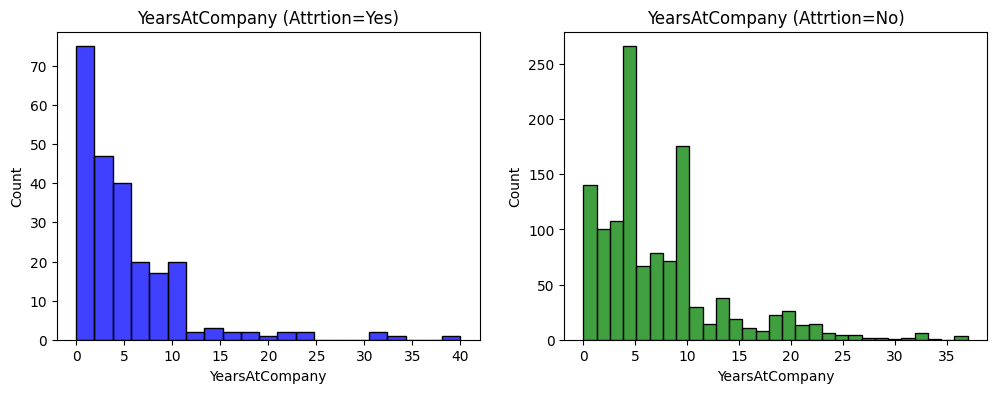

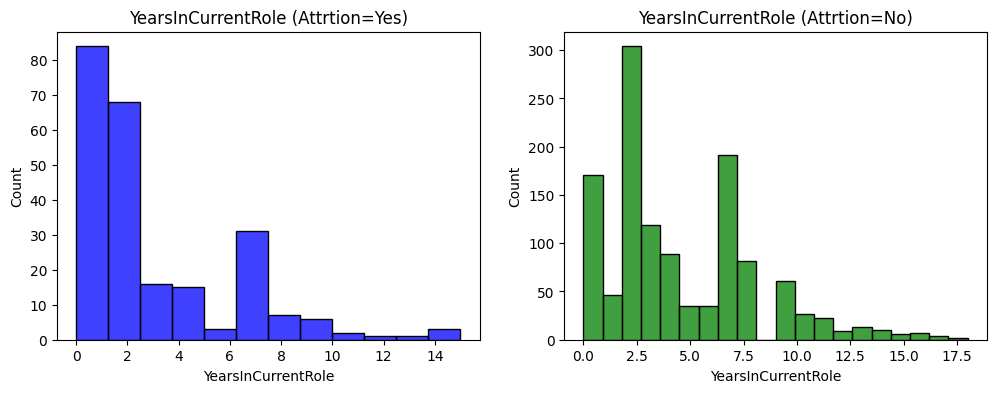

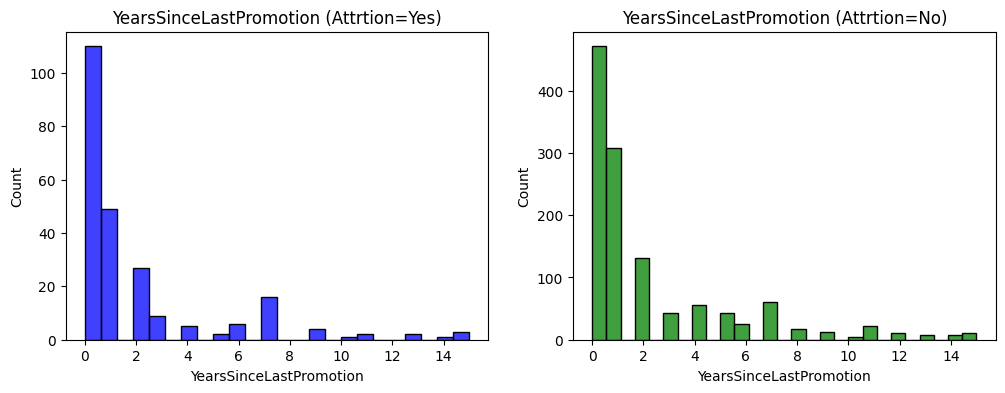

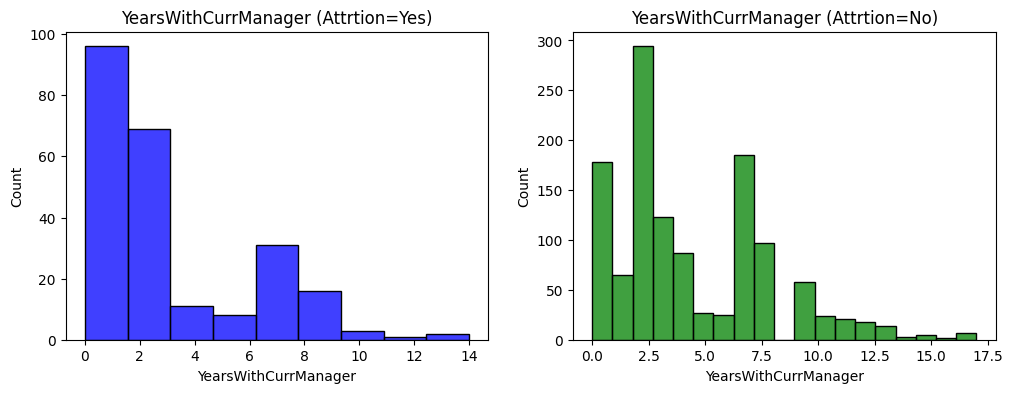

In [61]:
#Distribution of numerical columns with respect to target column
for i in df_num.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title(i+" (Attrtion=Yes)")
    sns.histplot(df_num[i][df["Attrition"]=="Yes"],color="b")
    plt.subplot(122)
    plt.title(i+" (Attrtion=No)")
    sns.histplot(df_num[i][df["Attrition"]=="No"],color="g")
    plt.show()

In [62]:
#We can see Hourly rate, Training times last year of both classes of target column (Yes and No) have same distribution.We can drop these columns
df_num.drop(["HourlyRate","TrainingTimesLastYear"],axis=1,inplace=True)

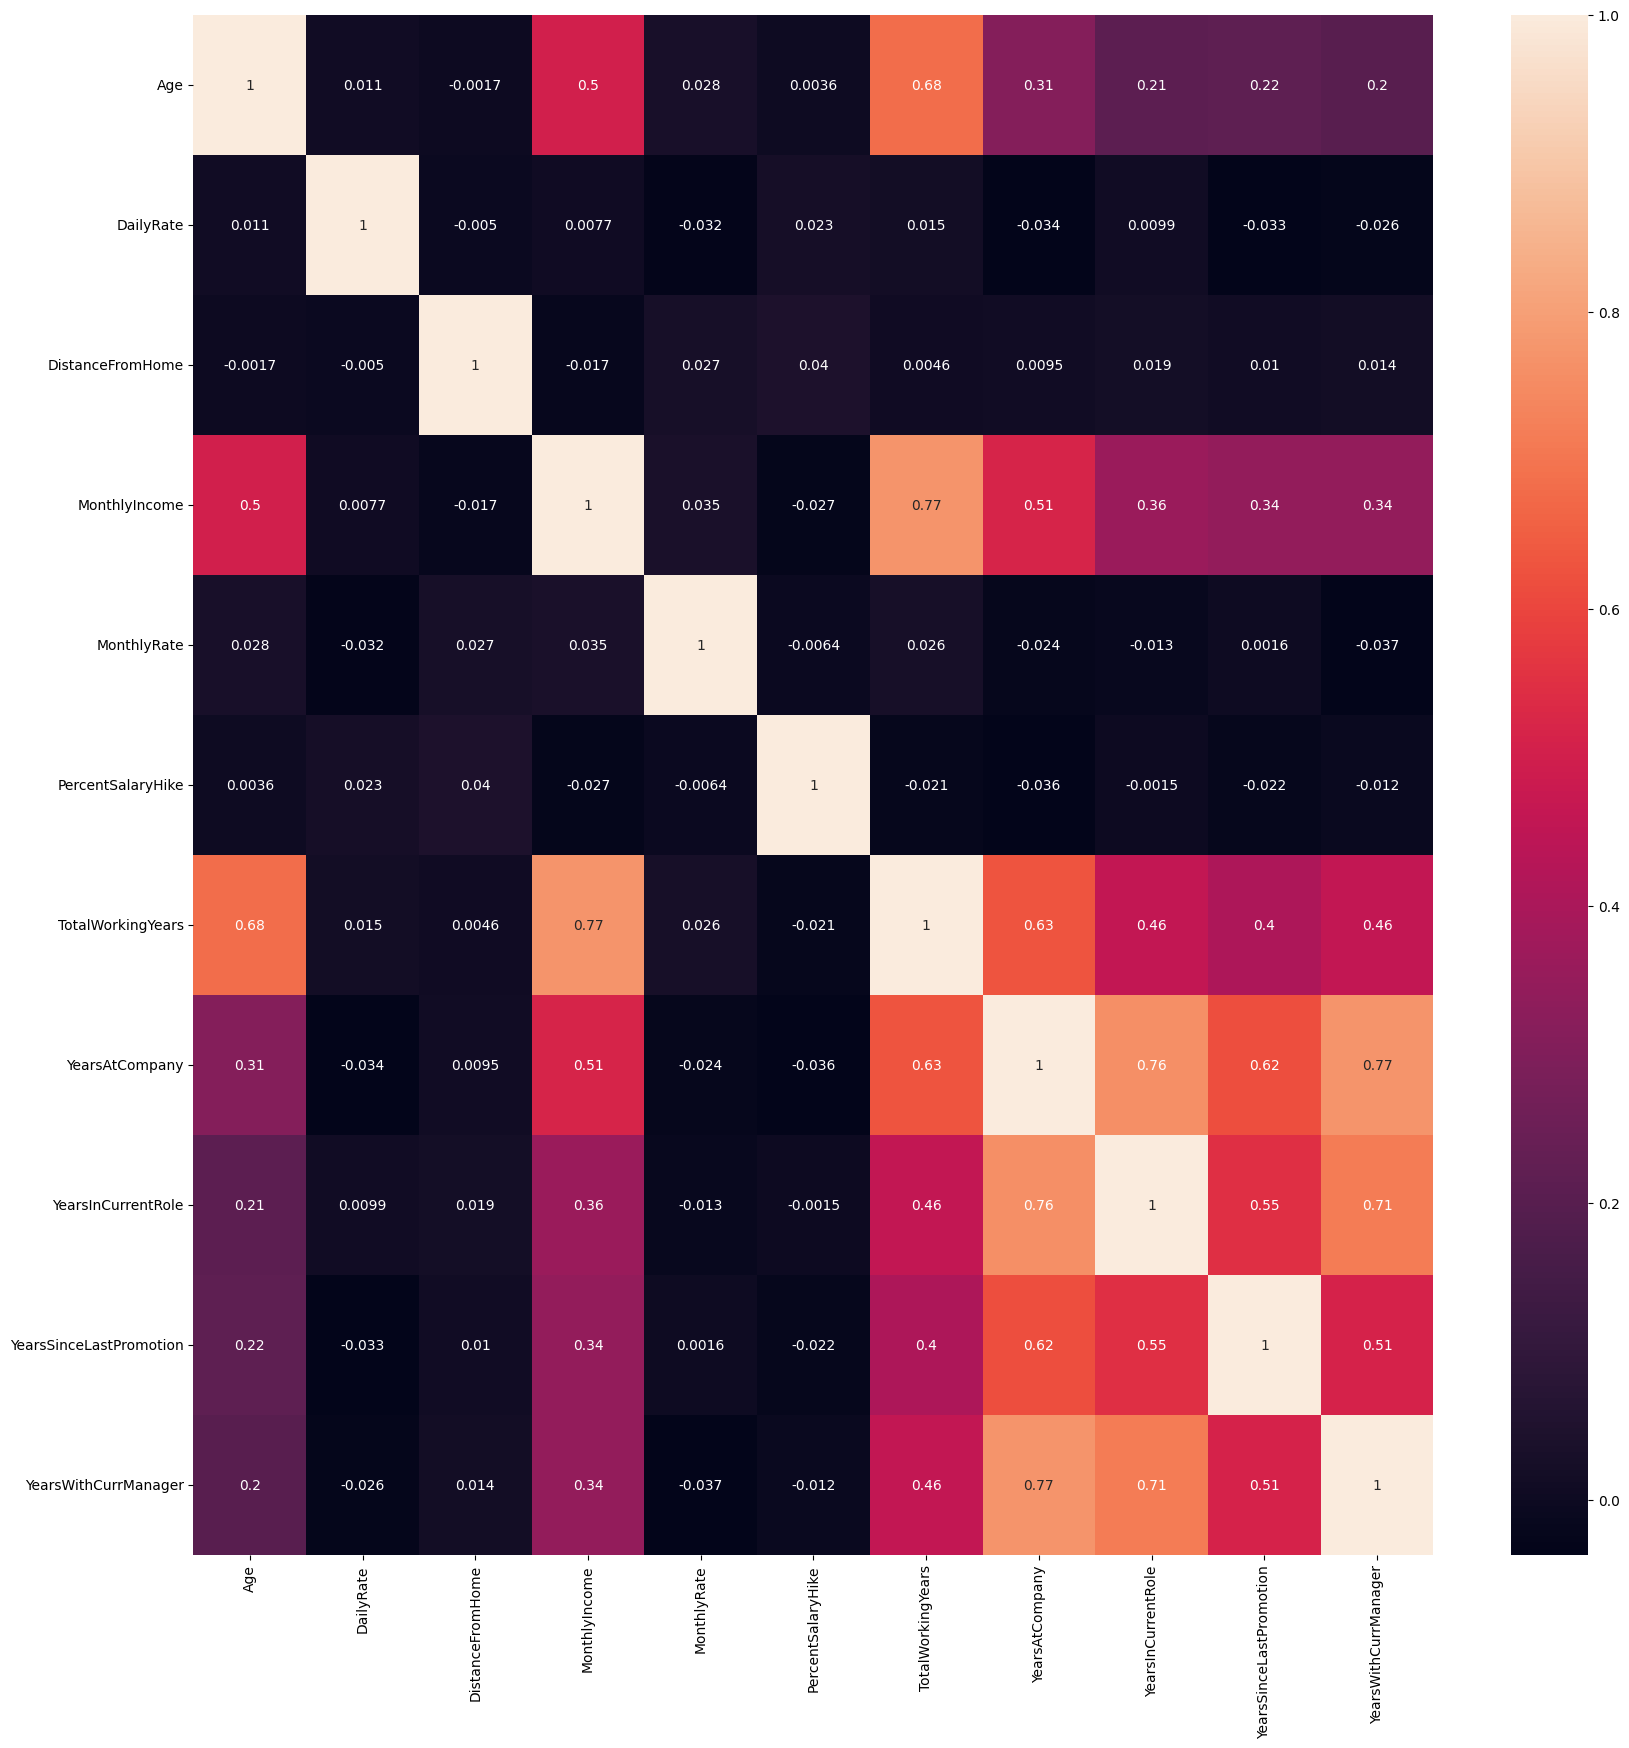

In [63]:
#Heat map correlation
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

monthly income and Yearsincurrentrole are highly correlated.

Yearsincurrent role and years in company are highly correlated.

We can perform feature engineering to convert two columns to one.

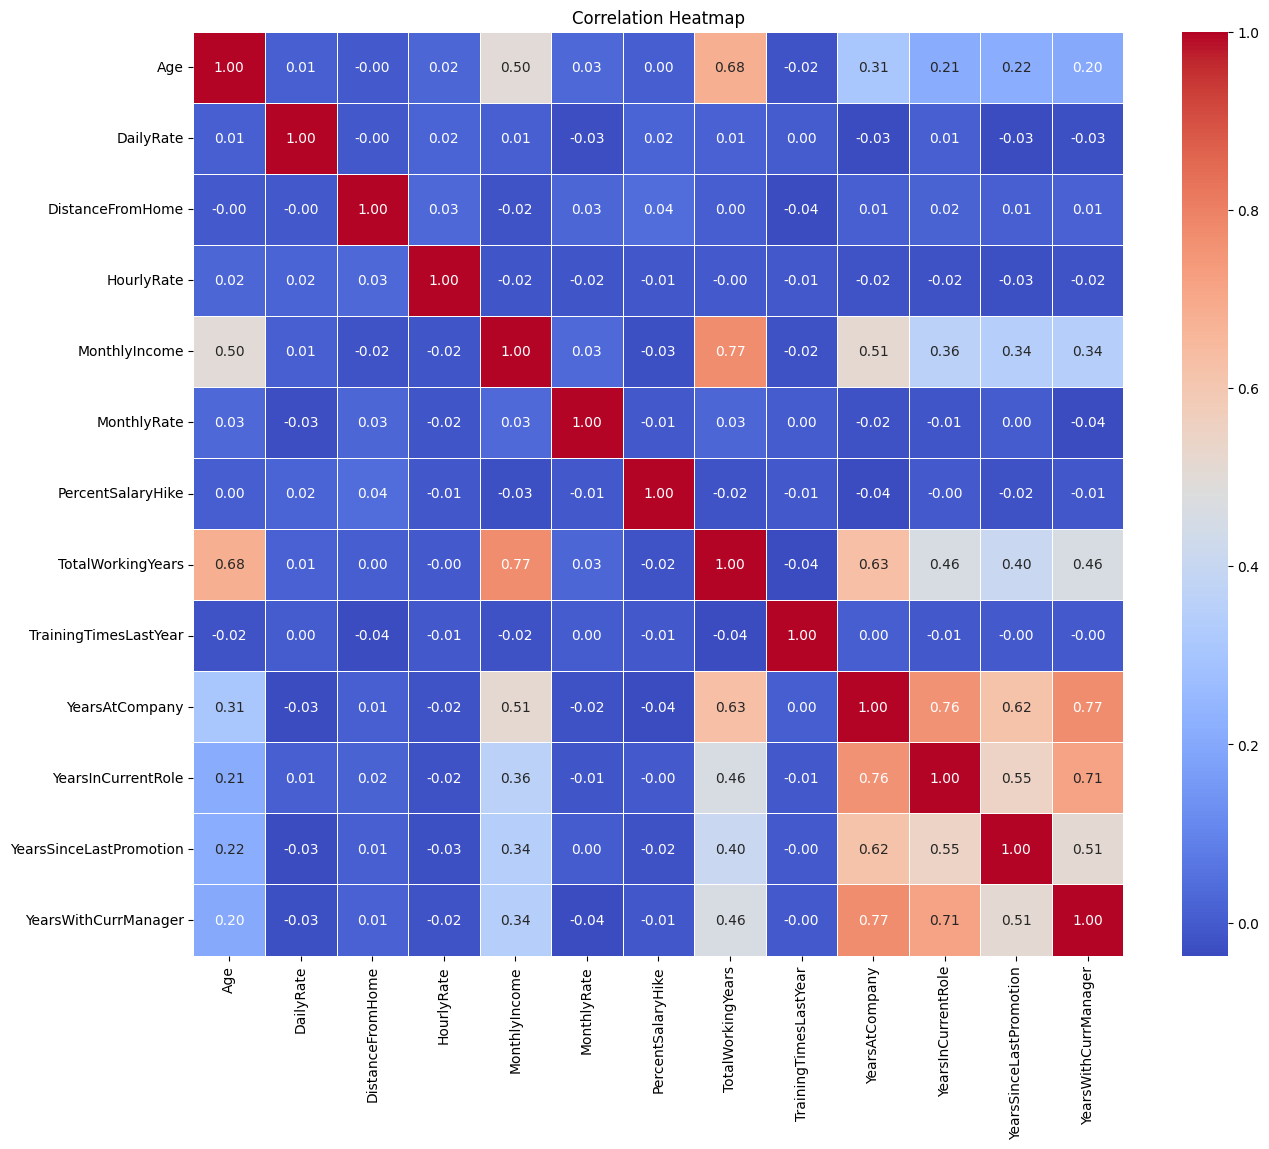

In [64]:
#heatmap
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix =  numeric_data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [65]:
#ANOVA test for correlationi between target and numerical features
for col in df_num.columns:
    yes = df_num[col][df["Attrition"]=="Yes"].values
    no = df_num[col][df["Attrition"]=="No"].values
    statistic,p_value = stats.f_oneway(yes,no)
    print("P-value for correlation between Attrition and",col," : ",round(p_value,2))

P-value for correlation between Attrition and Age  :  0.0
P-value for correlation between Attrition and DailyRate  :  0.03
P-value for correlation between Attrition and DistanceFromHome  :  0.0
P-value for correlation between Attrition and MonthlyIncome  :  0.0
P-value for correlation between Attrition and MonthlyRate  :  0.56
P-value for correlation between Attrition and PercentSalaryHike  :  0.61
P-value for correlation between Attrition and TotalWorkingYears  :  0.0
P-value for correlation between Attrition and YearsAtCompany  :  0.0
P-value for correlation between Attrition and YearsInCurrentRole  :  0.0
P-value for correlation between Attrition and YearsSinceLastPromotion  :  0.21
P-value for correlation between Attrition and YearsWithCurrManager  :  0.0


Since P-value of monthly Rate, percent salary hike and years since last promotion are very much higher than 0.05, we can drop it.
Because, those columns have no correlation with the target column.

In [66]:
df_num.drop(["MonthlyRate","PercentSalaryHike","YearsSinceLastPromotion"],axis=1,inplace=True)


# **Data Preprocessing**

In [67]:
#Display outliers present in each numerical columns
outlier_values = []
for i in df_num.columns:
    Q1 = np.quantile(df_num[i],0.25)
    Q3 = np.quantile(df_num[i],0.75)
    IQR = Q3-Q1
    ul = Q3+(IQR*1.5)
    ll = Q1-(IQR*1.5)
    outlier = df_num[(df_num[i]<ll) | (df_num[i]>ul)]
    outlier_values.append(outlier[i].values)

In [68]:
outliers = pd.DataFrame({"Outliers":outlier_values},index=[df_num.columns])
outliers

,Outliers
Age,[]
DailyRate,[]
DistanceFromHome,[]
MonthlyIncome,"[19094, 18947, 19545, 18740, 18844, 18172, 173..."
TotalWorkingYears,"[31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 3..."
YearsAtCompany,"[25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 2..."
YearsInCurrentRole,"[15, 16, 18, 15, 18, 17, 16, 15, 16, 15, 16, 1..."
YearsWithCurrManager,"[17, 15, 15, 15, 15, 17, 16, 17, 15, 17, 17, 1..."


In [69]:
#Outliers treatment using capping method
for i in df_num.columns:
    Q1 = np.quantile(df_num[i],0.25)
    Q3 = np.quantile(df_num[i],0.75)
    IQR = Q3-Q1
    ul = Q3+(IQR*1.5)
    ll = Q1-(IQR*1.5)
    for j in df_num.index:
        if df_num.loc[j,i]<ll:
            df_num.loc[j,i]=ll
        elif df_num.loc[j,i]>ul:
            df_num.loc[j,i] = ul

In [70]:
#Check for skewness in numerical columns
df_num.skew()

,0
Age,0.413286
DailyRate,-0.003519
DistanceFromHome,0.958118
MonthlyIncome,1.168595
TotalWorkingYears,0.855518
YearsAtCompany,0.900774
YearsInCurrentRole,0.803704
YearsWithCurrManager,0.741000


Since most of the columns are skewed we have to perform transformation.
We can perform Yeo-Johnson transformation since the columns have zeroes.

In [71]:
#Transformation of numerical columns using Yeo-Johnson
transformer = PowerTransformer()
transformed = pd.DataFrame(transformer.fit_transform(df_num),index=df_num.index,columns=df_num.columns)
transformed.skew()


,0
Age,-0.007603
DailyRate,-0.196160
DistanceFromHome,-0.007468
MonthlyIncome,0.027515
TotalWorkingYears,-0.027114
YearsAtCompany,-0.040850
YearsInCurrentRole,-0.067527
YearsWithCurrManager,-0.072928


In [72]:
df_num = transformed

# **Encoding**

In [73]:
#Encode categorical columns using Label Encoder
encoder = LabelEncoder()

In [74]:
for col in df_cat.columns:
    df_cat[col] = encoder.fit_transform(df_cat[[col]])

In [75]:
# Convert datatype of categorical columns from object to integer
for i in df_cat.columns:
    df_cat[i] = df_cat[i].astype(int)

In [76]:
df_cat.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,1,2,2,1,1,1,0,2,1,7,3,2,8,1,0,0,0,0
1,0,1,1,0,1,2,1,1,1,6,1,1,1,0,1,3,1,2
2,1,2,1,1,4,3,1,1,0,2,2,2,6,1,0,1,0,2
3,0,1,1,3,1,3,0,2,0,6,2,1,1,1,0,2,0,2
4,0,2,1,0,3,0,1,2,0,2,1,1,9,0,0,3,1,2



# **Feature Engineering**

In [77]:
df_num["PercentOfYearsInCurrentRole"] = df_num["YearsInCurrentRole"]/df_num["YearsAtCompany"]
df_num.drop(["YearsInCurrentRole","YearsAtCompany"],axis=1,inplace=True)

In [78]:
# Drop target column
df_cat.drop("Attrition",axis=1,inplace=True)


# **Train-Test Split**

In [90]:
#Define target and independent attributes
X = pd.concat([df_num,df_cat],axis=1)
y = df["Attrition"].map({"Yes":1,"No":0})


In [89]:
#Split the dataset into train set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 24)
(294, 24)
(1176,)
(294,)


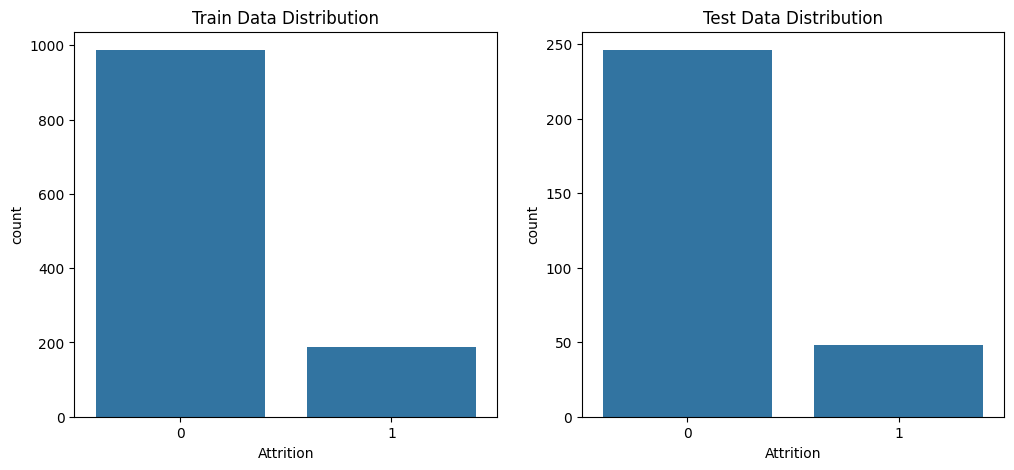

In [94]:
#check if train set and test set are representation of overall dataset
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x=y_train)
plt.title("Train Data Distribution")
plt.subplot(122)
sns.countplot(x=y_test)
plt.title("Test Data Distribution")
plt.show()



Since the distribution of train dataset and test dataset are similar, we can conclude that both train and test representative of the overall data.



# **Model Building**

In [83]:
#Train models using various classification algorithms
lr = LogisticRegression().fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
nb = GaussianNB().fit(X_train,y_train)
dt = DecisionTreeClassifier().fit(X_train,y_train)
rf = RandomForestClassifier().fit(X_train,y_train)
ab = AdaBoostClassifier().fit(X_train,y_train)
gb = GradientBoostingClassifier().fit(X_train,y_train)
xgb = XGBClassifier().fit(X_train,y_train)

In [84]:
#Models Comparison
train_scores = []
test_scores = []
models = [lr,knn,nb,dt,rf,ab,gb,xgb]
for model in models:
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    test_scores.append(accuracy_score(y_test,y_pred_test))
    train_scores.append(accuracy_score(y_train,y_pred_train))

In [95]:
model_performance = pd.DataFrame(index=["Logistic Regression","K-Nearest Neighbors","Naive Bayes","Decision Tree",
                                        "Random Forest","Ada Boost","Gradient Boost","XGBoost"],
                                 data={"Train accuracy":train_scores,"Test accuracy":test_scores})
model_performance

,Train accuracy,Test accuracy
Logistic Regression,0.886905,0.870748
K-Nearest Neighbors,0.878401,0.823129
Naive Bayes,0.841837,0.846939
Decision Tree,1.000000,0.772109
Random Forest,1.000000,0.867347
Ada Boost,0.895408,0.860544
Gradient Boost,0.953231,0.860544
XGBoost,1.000000,0.853741


Since Logistic Regression as performed the best in test set, we can use Logistic Regression model for our prediction.


# **Models Evaluation**

In [96]:
LogisticRegression_model = LogisticRegression().fit(X_train,y_train)
y_pred = LogisticRegression_model.predict(X_test)

In [97]:
#Accuracy Score
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.8707482993197279


In [98]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       246
           1       0.75      0.31      0.44        48

    accuracy                           0.87       294
   macro avg       0.81      0.65      0.68       294
weighted avg       0.86      0.87      0.85       294



In [115]:
#Overall Fit of the model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_test = logreg_model.predict(X_test)
y_pred_train = logreg_model.predict(X_train)

In [116]:
print("Accuracy of test set: ",accuracy_score(y_test,y_pred_test))
print("Accuracy of train set: ",accuracy_score(y_train,y_pred_train))

Accuracy of test set:  0.8707482993197279
Accuracy of train set:  0.8852040816326531


Since the model has performed good in both training and test set, it has generalized well.
We can conclude that the model is well fit.